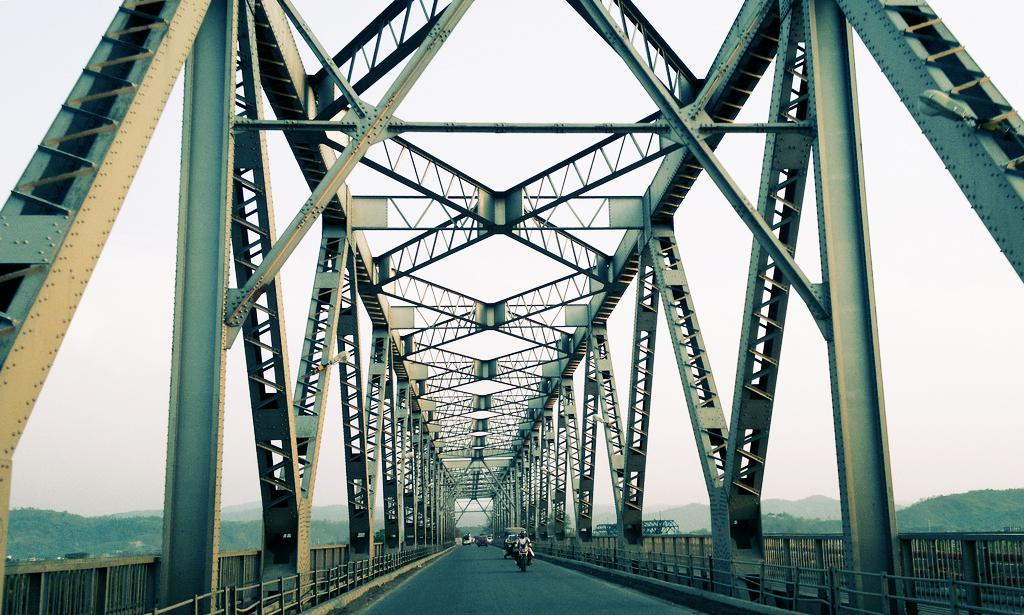

In [2]:
import numpy as np
from PIL import Image as image
from IPython.display import display, Image
from io import BytesIO

img = np.array(image.open('bridge.jpg'))
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

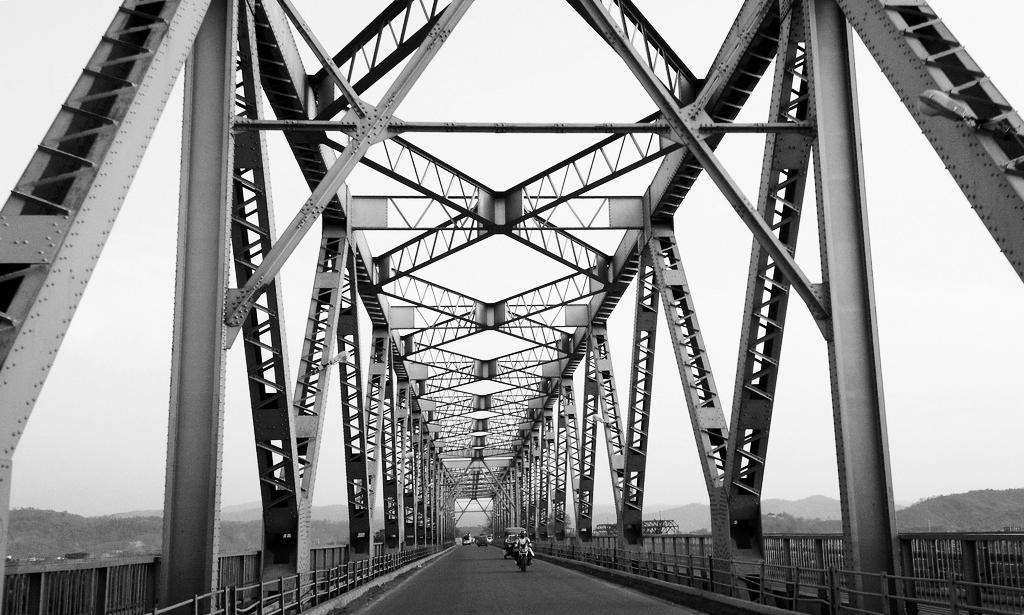

In [3]:
gray = np.zeros((img.shape[0], img.shape[1]))

for i in range(len(img)):
    for j in range(len(img[i])):
        gray[i][j] = 0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2]

f = BytesIO()
image.fromarray(gray.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

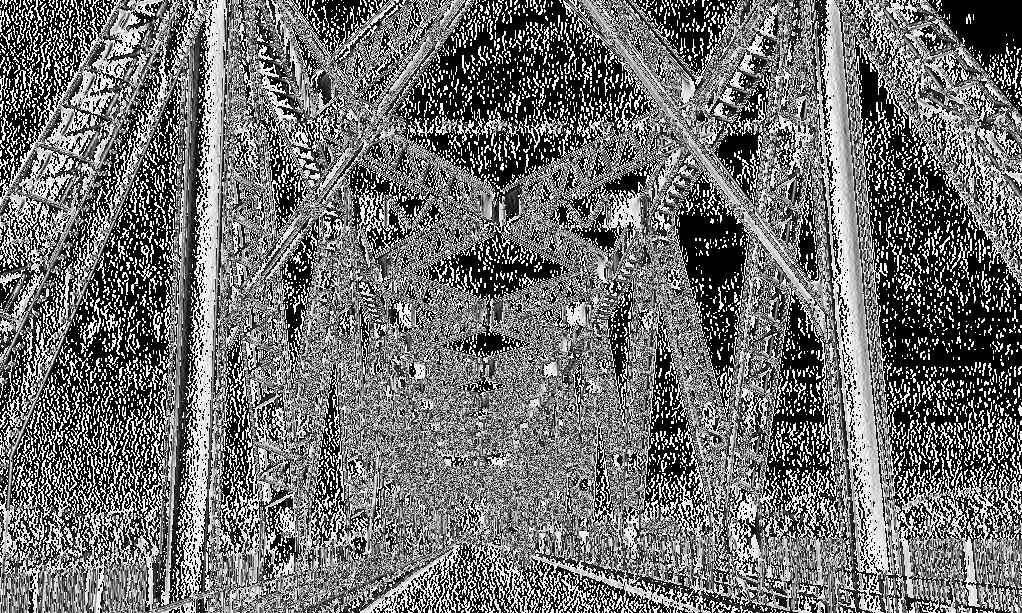

In [4]:
## x sobel filter ##

sobel_kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
sobelx = np.zeros((img.shape[0]-2, img.shape[1]-2))

for i in range(img.shape[0]-2):
    for j in range(img.shape[1]-2):
        sobelx[i][j] = np.sum(np.multiply(gray[i:i+3, j:j+3], sobel_kernel_x))

f = BytesIO()
image.fromarray(sobelx.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

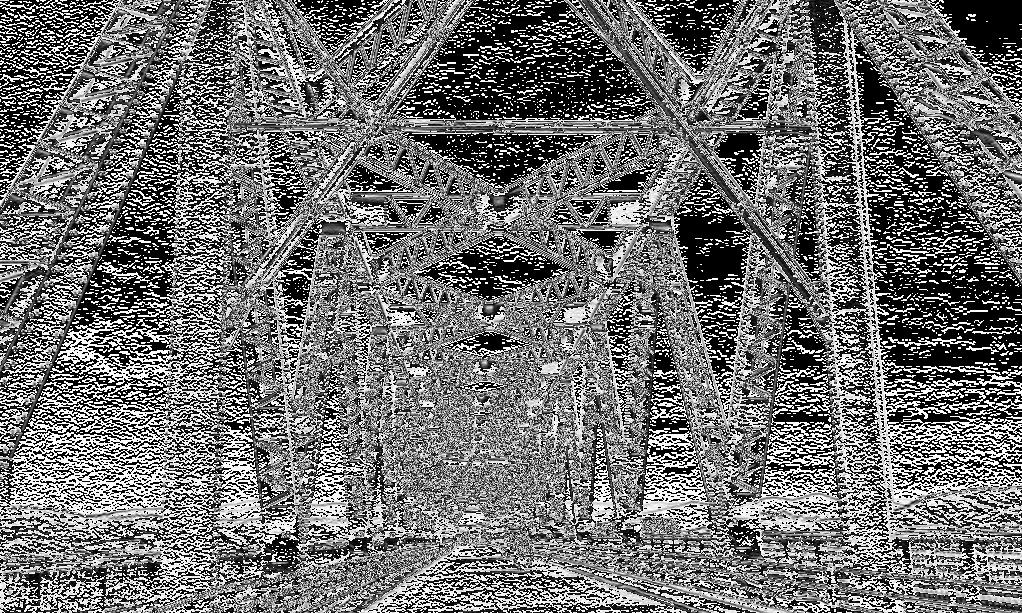

In [5]:
## y sobel filter ##

sobel_kernel_y = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])
sobely = np.zeros((img.shape[0]-2, img.shape[1]-2))

for i in range(img.shape[0]-2):
    for j in range(img.shape[1]-2):
        sobely[i][j] = np.sum(np.multiply(gray[i:i+3, j:j+3], sobel_kernel_y))

f = BytesIO()
image.fromarray(sobely.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

In [ ]:
##### Compare this with opencv output #####

import cv2

image = cv2.imread('bridge.jpg')
Sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)
cv2.imshow('image', Sobelx)
cv2.imshow('image2', sobelx)
cv2.waitKey(0)